In [1]:
from classification import DecisionTree
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

df = pd.read_csv('../cancer_data.csv')
df.columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14552 entries, 0 to 14551
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   subject_id                   14552 non-null  object
 1   race                         14552 non-null  object
 2   sex                          14552 non-null  object
 3   age_at_diagnosis             14552 non-null  int64 
 4   morphology                   14552 non-null  object
 5   primary_diagnosis            14552 non-null  object
 6   primary_diagnosis_condition  14552 non-null  object
 7   primary_diagnosis_site       14552 non-null  object
 8   vital_status                 14552 non-null  object
 9   treatment_type               14552 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.1+ MB


In [2]:
df['treatment_type'].value_counts()

treatment_type
Radiation Therapy, NOS                         7180
Pharmaceutical Therapy, NOS                    7147
Surgery, NOS                                     55
Chemotherapy                                     51
Targeted Molecular Therapy                       50
Immunotherapy (Including Vaccines)               48
Radiation, 3D Conformal                           8
Radiation, 2D Conventional                        5
Hormone Therapy                                   4
Radiation, Intensity-Modulated Radiotherapy       3
Radiation, Proton Beam                            1
Name: count, dtype: int64

In [3]:
# Keep rows where 'treatment_type' is 'A' or 'B'
values_to_keep = ['Radiation Therapy, NOS', 'Pharmaceutical Therapy, NOS']
df_filtered = df[df['treatment_type'].isin(values_to_keep)]
df_filtered = pd.DataFrame(df_filtered.copy())

print(df_filtered['treatment_type'].value_counts())
df_filtered.info()

treatment_type
Radiation Therapy, NOS         7180
Pharmaceutical Therapy, NOS    7147
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 14327 entries, 4 to 14551
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   subject_id                   14327 non-null  object
 1   race                         14327 non-null  object
 2   sex                          14327 non-null  object
 3   age_at_diagnosis             14327 non-null  int64 
 4   morphology                   14327 non-null  object
 5   primary_diagnosis            14327 non-null  object
 6   primary_diagnosis_condition  14327 non-null  object
 7   primary_diagnosis_site       14327 non-null  object
 8   vital_status                 14327 non-null  object
 9   treatment_type               14327 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


In [4]:
# bin the age column
bin_intervals = range(0, df['age_at_diagnosis'].max() + 5000, 5000)

bin_labels = [f"{bin_intervals[i]}-{bin_intervals[i+1] - 1}" for i in range (len(bin_intervals) - 1)]

df_filtered['age_at_diagnosis'] = pd.cut(df['age_at_diagnosis'], bins=bin_intervals, labels=bin_labels, right=False)

df_filtered

,subject_id,race,sex,age_at_diagnosis,morphology,primary_diagnosis,primary_diagnosis_condition,primary_diagnosis_site,vital_status,treatment_type
4,HCMI.HCM-BROD-0002-C71,white,male,20000-24999,9442/3,Gliosarcoma,Gliomas,Brain,Dead,"Radiation Therapy, NOS"
9,HCMI.HCM-BROD-0003-C71,white,female,25000-29999,9440/3,Glioblastoma,Gliomas,Brain,Dead,"Radiation Therapy, NOS"
10,HCMI.HCM-BROD-0011-C71,white,male,15000-19999,9440/3,Glioblastoma,Gliomas,Brain,Dead,"Radiation Therapy, NOS"
19,HCMI.HCM-BROD-0012-C71,white,female,20000-24999,9440/3,Glioblastoma,Gliomas,Brain,Dead,"Radiation Therapy, NOS"
24,HCMI.HCM-BROD-0014-C71,white,male,20000-24999,9440/3,Glioblastoma,Gliomas,Brain,Dead,"Radiation Therapy, NOS"
...,...,...,...,...,...,...,...,...,...,...
14547,TCGA.TCGA-Z7-A8R5,white,female,20000-24999,8520/3,"Lobular carcinoma, NOS",Breast Cancer,Breast,Alive,"Pharmaceutical Therapy, NOS"
14548,TCGA.TCGA-Z7-A8R6,white,female,15000-19999,8022/3,Pleomorphic carcinoma,"Epithelial Neoplasms, NOS",Breast,Alive,"Radiation Therapy, NOS"
14549,TCGA.TCGA-Z7-A8R6,white,female,15000-19999,8022/3,Pleomorphic carcinoma,"Epithelial Neoplasms, NOS",Breast,Alive,"Pharmaceutical Therapy, NOS"
14550,TCGA.TCGA-Z7-A8R6,white,female,15000-19999,8022/3,Pleomorphic carcinoma,Breast Cancer,Breast,Alive,"Radiation Therapy, NOS"


In [5]:
df_filtered.head()

,subject_id,race,sex,age_at_diagnosis,morphology,primary_diagnosis,primary_diagnosis_condition,primary_diagnosis_site,vital_status,treatment_type
4,HCMI.HCM-BROD-0002-C71,white,male,20000-24999,9442/3,Gliosarcoma,Gliomas,Brain,Dead,"Radiation Therapy, NOS"
9,HCMI.HCM-BROD-0003-C71,white,female,25000-29999,9440/3,Glioblastoma,Gliomas,Brain,Dead,"Radiation Therapy, NOS"
10,HCMI.HCM-BROD-0011-C71,white,male,15000-19999,9440/3,Glioblastoma,Gliomas,Brain,Dead,"Radiation Therapy, NOS"
19,HCMI.HCM-BROD-0012-C71,white,female,20000-24999,9440/3,Glioblastoma,Gliomas,Brain,Dead,"Radiation Therapy, NOS"
24,HCMI.HCM-BROD-0014-C71,white,male,20000-24999,9440/3,Glioblastoma,Gliomas,Brain,Dead,"Radiation Therapy, NOS"


In [6]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14327 entries, 4 to 14551
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   subject_id                   14327 non-null  object  
 1   race                         14327 non-null  object  
 2   sex                          14327 non-null  object  
 3   age_at_diagnosis             14327 non-null  category
 4   morphology                   14327 non-null  object  
 5   primary_diagnosis            14327 non-null  object  
 6   primary_diagnosis_condition  14327 non-null  object  
 7   primary_diagnosis_site       14327 non-null  object  
 8   vital_status                 14327 non-null  object  
 9   treatment_type               14327 non-null  object  
dtypes: category(1), object(9)
memory usage: 1.1+ MB


In [7]:
# Function to calculate performance metrics
def calculate_performance(validation_y, validation_y_hat):
    # Ensure inputs are lists
    validation_y = list(validation_y)
    validation_y_hat = list(validation_y_hat)
    
    # Initialize counters
    true_positive = 0
    false_positive = 0
    false_negative = 0
    true_negative = 0

    # Count TP, FP, TN, FN including -1 cases (for multiclass classification)
    for actual, predicted in zip(validation_y, validation_y_hat):
        if actual == 1 and predicted == 1:
            true_positive += 1
        elif actual == 0 and predicted == 1:
            false_positive += 1
        elif actual == 1 and predicted == 0:
            false_negative += 1
        elif actual == 0 and predicted == 0:
            true_negative += 1
        elif actual == -1:
            if predicted == -1:
                true_negative += 1
            else:
                false_positive += 1
        elif predicted == -1:
            false_negative += 1

    # Calculate metrics
    accuracy = (true_positive + true_negative) / len(validation_y)
    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0

    # Print metrics
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    

In [8]:
import pandas as pd
from category_encoders import BinaryEncoder

df_features = df_filtered.drop(columns=['subject_id', 'race', 'morphology', 'vital_status'])
df_target = df_filtered['vital_status'].map({'Alive': 1, 'Dead': 0}) # Binary-encoded target
print(df_features.info())

# Initialize BinaryEncoder for the features
encoder = BinaryEncoder(cols=df_features.columns)

# Fit and transform the features
df_encoded = pd.DataFrame(encoder.fit_transform(df_features))

print(df_encoded.head())

X = df_encoded  # features
y = df_target   # target

print(y.value_counts())

# Train-test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)

# # Convert X splits into lists
X_train = X_train.values.tolist()  # Features for training set as a list of lists
X_val = X_val.values.tolist()      # Features for validation set as a list of lists
X_test = X_test.values.tolist()    # Features for test set as a list of lists
y_train = y_train.values.tolist()  # Features for training set as a list of lists
y_val = y_val.values.tolist()      # Features for validation set as a list of lists
y_test = y_test.values.tolist()    # Features for test set as a list of lists

# classifier = DecisionTree()
classifier = DecisionTree()
classifier.fit(X_train, y_train)

train_y_hat = classifier.predict(X_train)
validation_y_hat = classifier.predict(X_val)
test_y_hat = classifier.predict(X_test)

# Generate classification report
val_report = classification_report(y_val, validation_y_hat)
print("Validation performance: \n", val_report)

test_report = classification_report(y_test, test_y_hat)
print("Test performance: \n", test_report)

print("\nValidation performance:")
calculate_performance(y_val, validation_y_hat)

print("\nTest performance:")
calculate_performance(y_test, test_y_hat)

<class 'pandas.core.frame.DataFrame'>
Index: 14327 entries, 4 to 14551
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   sex                          14327 non-null  object  
 1   age_at_diagnosis             14327 non-null  category
 2   primary_diagnosis            14327 non-null  object  
 3   primary_diagnosis_condition  14327 non-null  object  
 4   primary_diagnosis_site       14327 non-null  object  
 5   treatment_type               14327 non-null  object  
dtypes: category(1), object(5)
memory usage: 685.9+ KB
None
    sex_0  sex_1  age_at_diagnosis_0  age_at_diagnosis_1  age_at_diagnosis_2  \
4       0      1                   1                   0                   1   
9       1      0                   1                   1                   0   
10      0      1                   1                   0                   0   
19      1      0                   1         

/Users/tommy/Coding/Python/Data Mining/CS4990-DataMiningProj/env/lib/python3.13/site-packages/sklearn/base.py:411: FutureWarning: The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.
  warnings.warn(


Validation performance: 
               precision    recall  f1-score   support

           0       0.67      0.64      0.66       792
           1       0.80      0.82      0.81      1357

    accuracy                           0.75      2149
   macro avg       0.73      0.73      0.73      2149
weighted avg       0.75      0.75      0.75      2149

Test performance: 
               precision    recall  f1-score   support

           0       0.69      0.67      0.68       795
           1       0.81      0.83      0.82      1355

    accuracy                           0.77      2150
   macro avg       0.75      0.75      0.75      2150
weighted avg       0.76      0.77      0.77      2150


Validation performance:
Accuracy: 0.75
Precision: 0.80
Recall: 0.82

Test performance:
Accuracy: 0.77
Precision: 0.81
Recall: 0.83


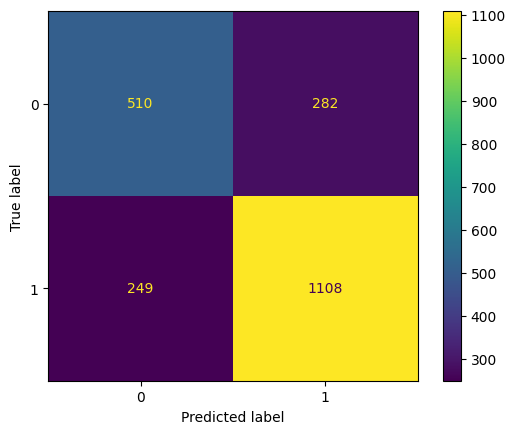

In [9]:
# Generate and display confusion matrix
cm = confusion_matrix(y_val, validation_y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()

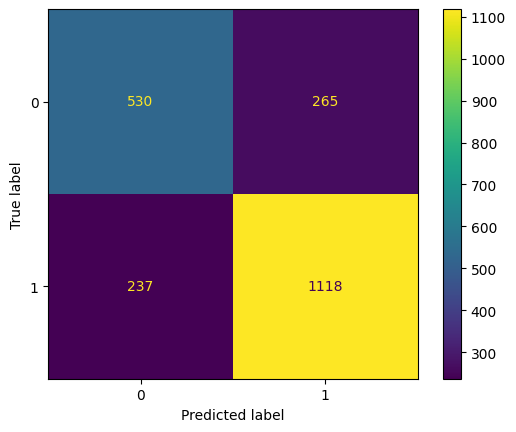

In [10]:
# Generate and display confusion matrix
cm = confusion_matrix(y_test, test_y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()

In [12]:
classifier.to_dict()

{'type': 'split',
 'column': 17,
 'children': {0: {'type': 'split',
   'column': 5,
   'children': {0: {'type': 'split',
     'column': 6,
     'children': {0: {'type': 'split',
       'column': 16,
       'children': {1: {'type': 'split',
         'column': 3,
         'children': {0: {'type': 'split',
           'column': 4,
           'children': {1: {'type': 'split',
             'column': 10,
             'children': {0: {'type': 'split',
               'column': 14,
               'children': {0: {'type': 'split',
                 'column': 8,
                 'children': {1: {'type': 'split',
                   'column': 7,
                   'children': {0: {'type': 'split',
                     'column': 19,
                     'children': {0: {'type': 'class', 'class': 0},
                      1: {'type': 'class', 'class': 0}}},
                    1: {'type': 'class', 'class': 1}}},
                  0: {'type': 'split',
                   'column': 19,
                   